<a href="https://colab.research.google.com/github/69421/mathematic-for-quantitative-finance/blob/main/bayesian_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilité bayesiennes

https://en.wikipedia.org/wiki/Bayesian_probability

In [11]:
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [12]:
tickers = ['AMD']
start = '2020-01-01'
end = '2023-01-01'

# load the data
dataset = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [13]:
# prepare the data
data = dataset['Close'].values

In [14]:
# calculate the daily returns
returns = data[1:] / data[:-1] - 1

In [15]:
# assume the returns follw a normal distribution
mu = np.mean(returns)
sigma = np.std(returns)

# Define a prior belief about future returns (you can adjust this as needed)
prior_mu = 0.001
prior_sigma = 1.0

In [16]:
# bayesian update with new data (i.e for the next day)
new_data = np.random.normal(mu, sigma)
posterior_mu = (prior_sigma**2 * prior_mu + new_data * sigma**2) / (prior_sigma**2 + sigma**2)
posterior_sigma = np.sqrt(1 / (1 / prior_sigma**2 + 1 / sigma**2))


In [17]:
# calculate the probability of a positive return for the next day
probability_positive_return = 1 - stats.norm.cdf(0, loc = posterior_mu, scale = posterior_sigma)

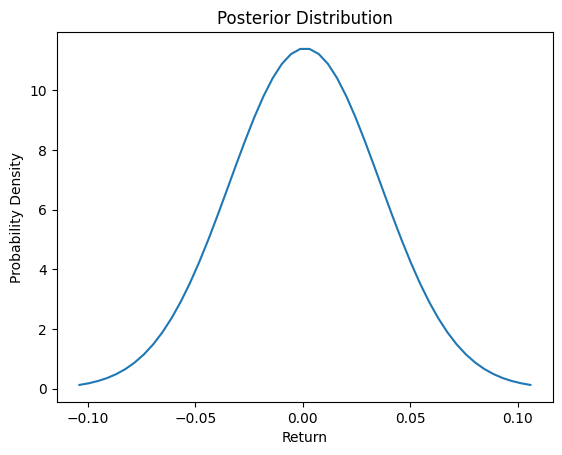

Estimated posterior mean 0.0010107482702341284
Estimated posterior standard deviation 0.03496247320997538
Probability of Positive Return: 51.15%


In [18]:
# plot the posterior distribution
x = np.linspace(posterior_mu - 3 * posterior_sigma, posterior_mu + 3 * posterior_sigma)
y = stats.norm.pdf(x, loc = posterior_mu, scale = posterior_sigma)
plt.plot(x, y)
plt.title('Posterior Distribution')
plt.xlabel('Return')
plt.ylabel('Probability Density')
plt.show()

print(f'Estimated posterior mean', posterior_mu)
print(f'Estimated posterior standard deviation', posterior_sigma)
print(f"Probability of Positive Return: {probability_positive_return:.2%}")
